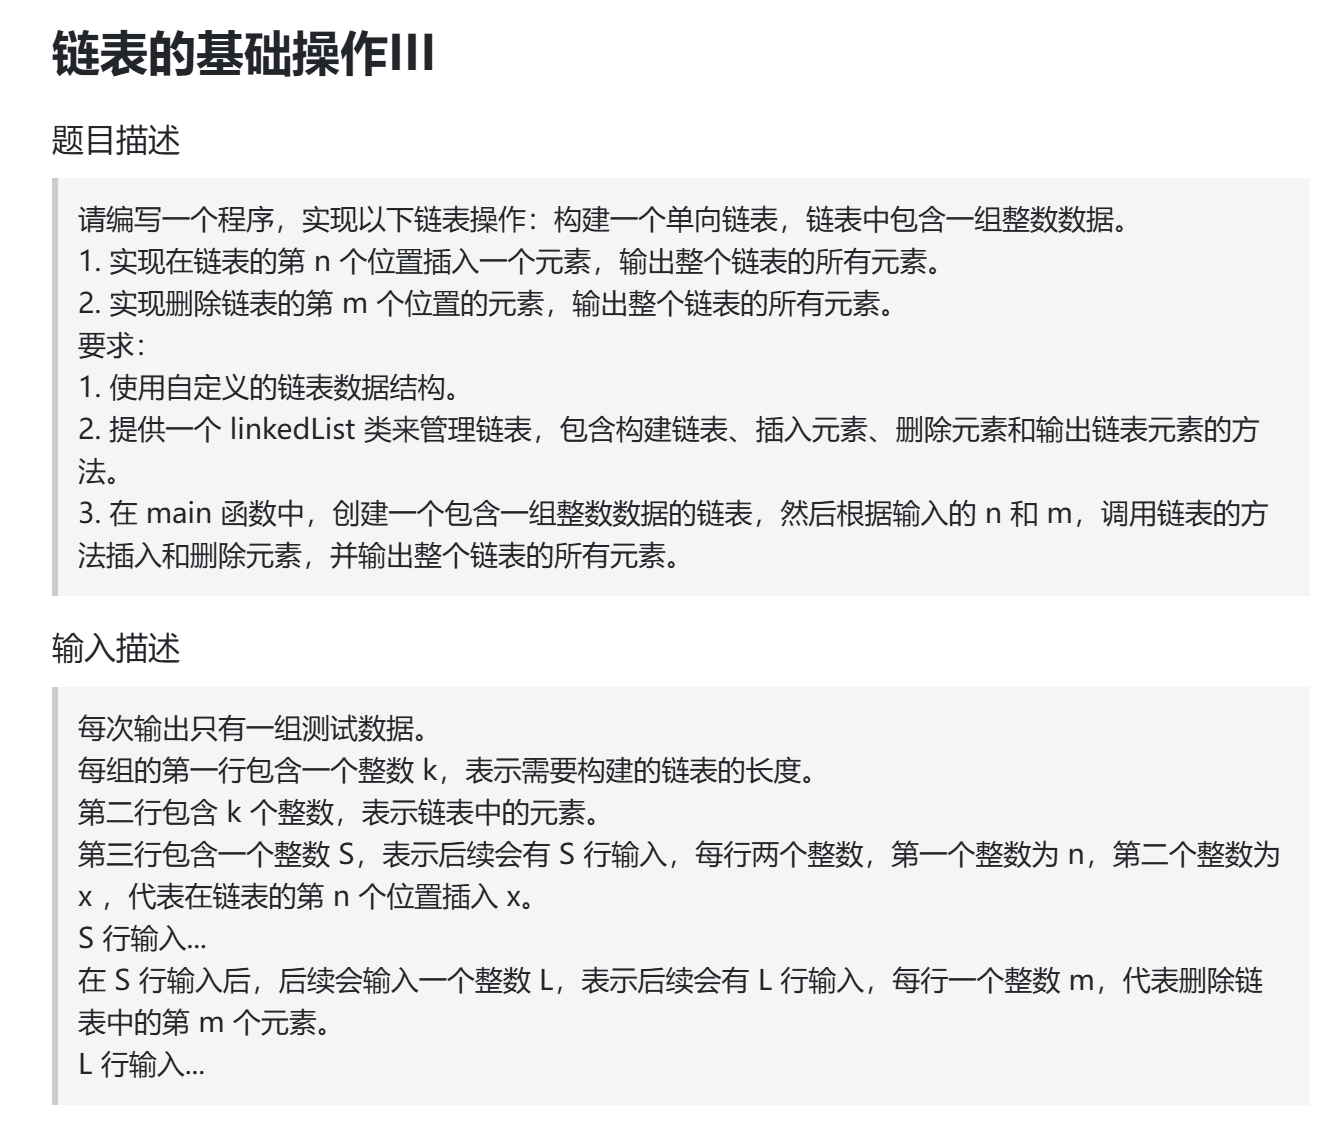
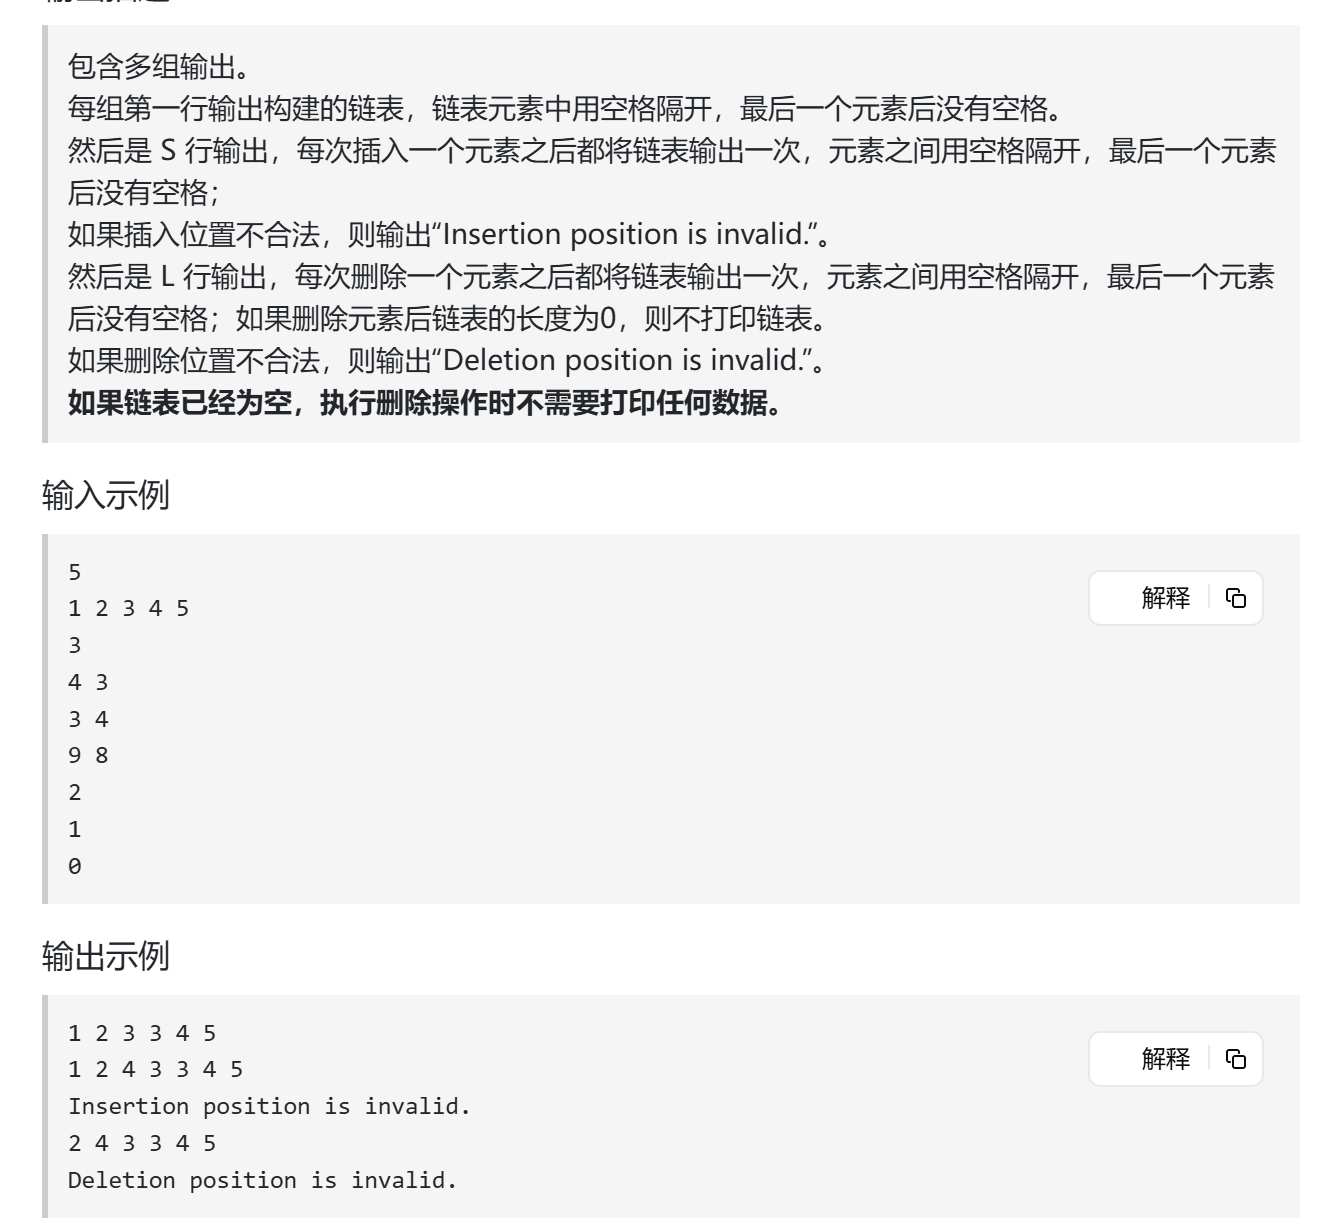

### 往链表的中间插入节点



>之前是往链表的尾部添加节点以及打印链表的第 m 个节点，如果只是往链表的尾部添加节点，那链表和数组也没有什么差异了，之前我们也提到过，往数组的中间插入一个元素，后续所有元素都需要往后挪动一位，而链表则不必这么麻烦

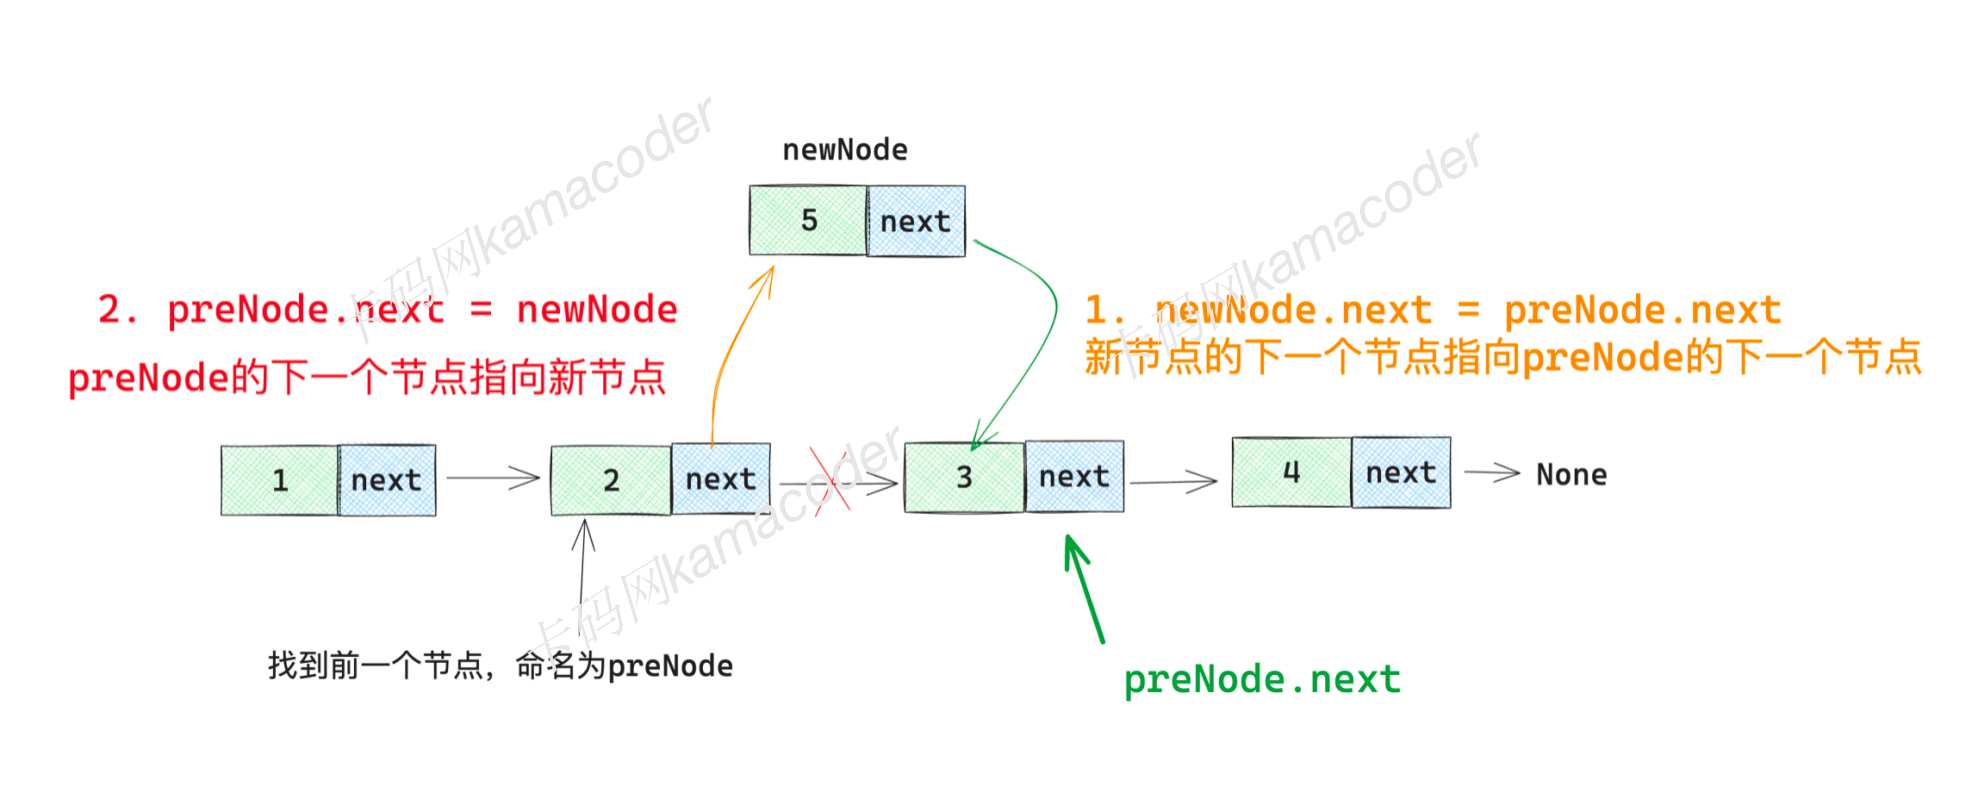

- 如果要在头节点处插入新的节点（新的节点成为头节点）：
  - 新节点的`next`指针指向原来的头节点：
  ```python
  new_node.next = head_node
  ```
  - 新节点成为新的头节点
  ```python
  new_node = head_node
  ```
  - 链表长度 + 1

- 如果要在非头节点处插入新的节点：
  - 找到要插入的位置的前一个节点，将之命名为`pre_node`
  - 将新节点的`next`指针指向`pre_node`的`next`指针，即
  ```python
  new_node.next = pre_node.next
  ```
  - 将`pre_node`的`next`指针指向新节点，即
  ```python
  pre_node.next = new_node
  ```
  - 链表长度 + 1

In [ ]:
# 代码如下：
# 在第 n 个位置插入元素
def insert_at(self, n, data):
    new_node = Node(data)
    if n == 1:  # 头节点的情况
        new_node.next = self.head_node # 新节点的 next 指向原来的头节点
        self.headNode = new_node #  新节点成为新的头节点
        self.length += 1 # 链表长度 + 1
        return new_node
    else:  # 不是头节点的情况
        pre_node = self.get(n - 1) # 使用 get 方法获取要插入位置的前一个节点，命名 pre_node
        if pre_node is not None:
            new_node.next = pre_node.next # 将新节点的 next 指针指向 pre_node 的 next 指针
            pre_node.next = new_node # 将 pre_node 的 next 指针指向新节点
            self.length += 1 # 链表长度 + 1
            return new_node
    return None

### 删除链表的过程

- 如果链表不存在头节点：表示链表为空，返回`None`
- 如果链表存在头节点（链表不为空），要删除头节点：
  - 新的头节点指向当前头节点的`next`节点
  ```python
  new_head = head_node.next
  ```
  - 链表长度 - 1

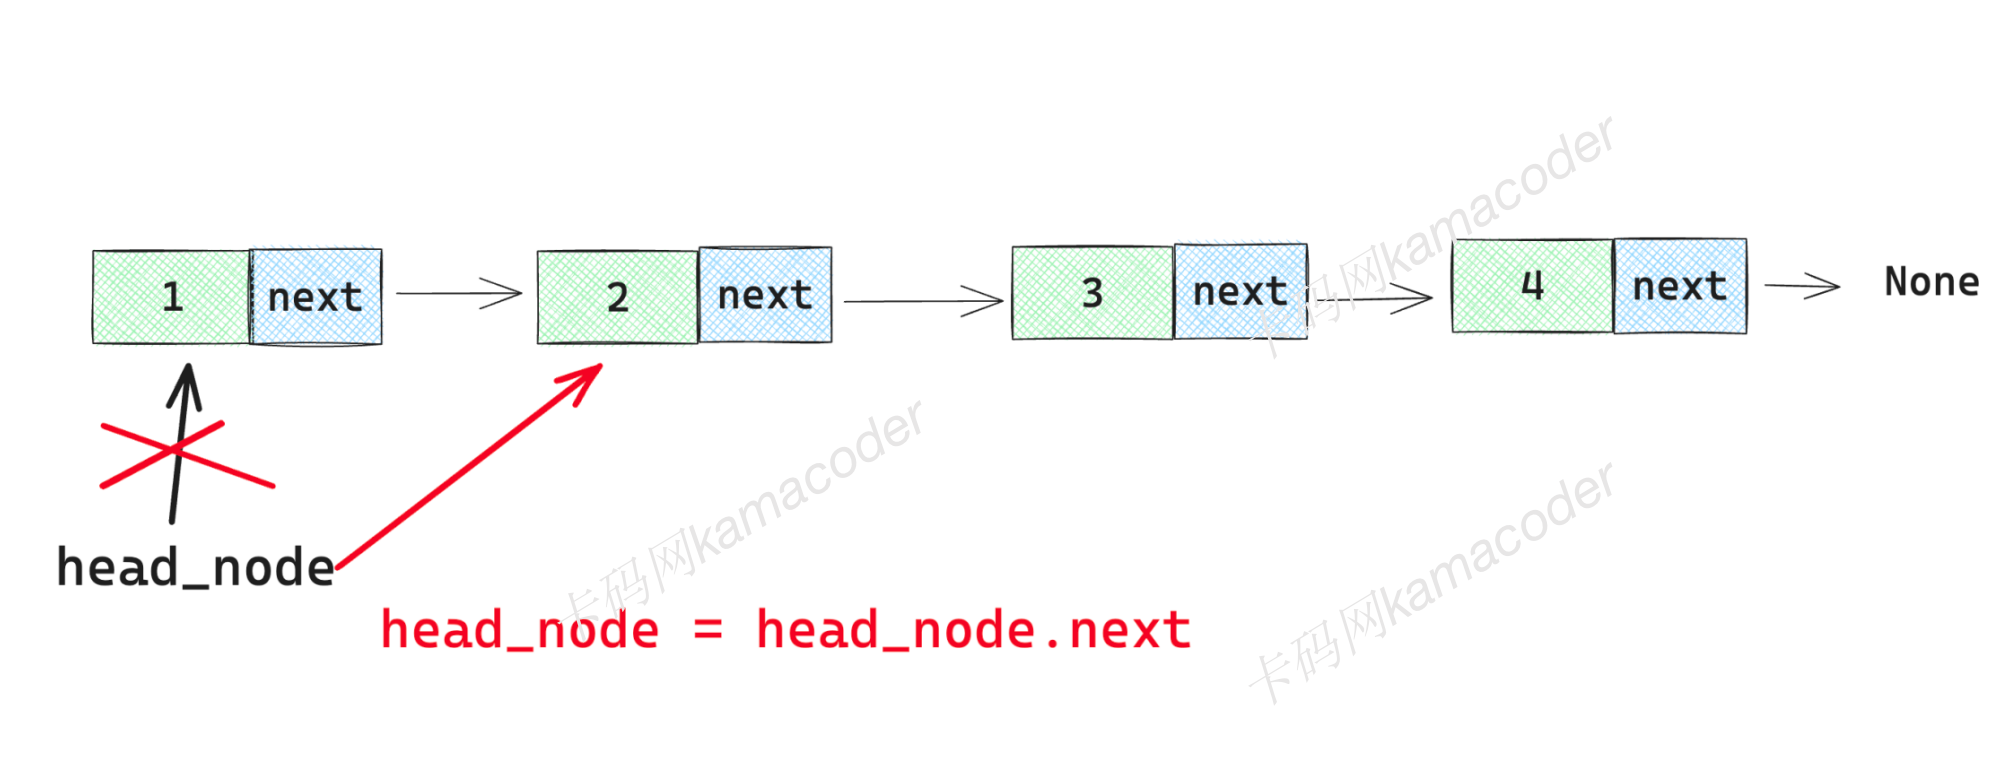

- 如果链表存在头节点，要删除非头节点：
  - 找到要删除节点的前一个节点`pre_node`
  - 并将其`next`指针设置为指向下下个节点，从而跳过了下一个节点，实现节点的删除操作。
  ```python
  pre_node.next = pre_node.next.next
  ```
  - 链表长度 - 1

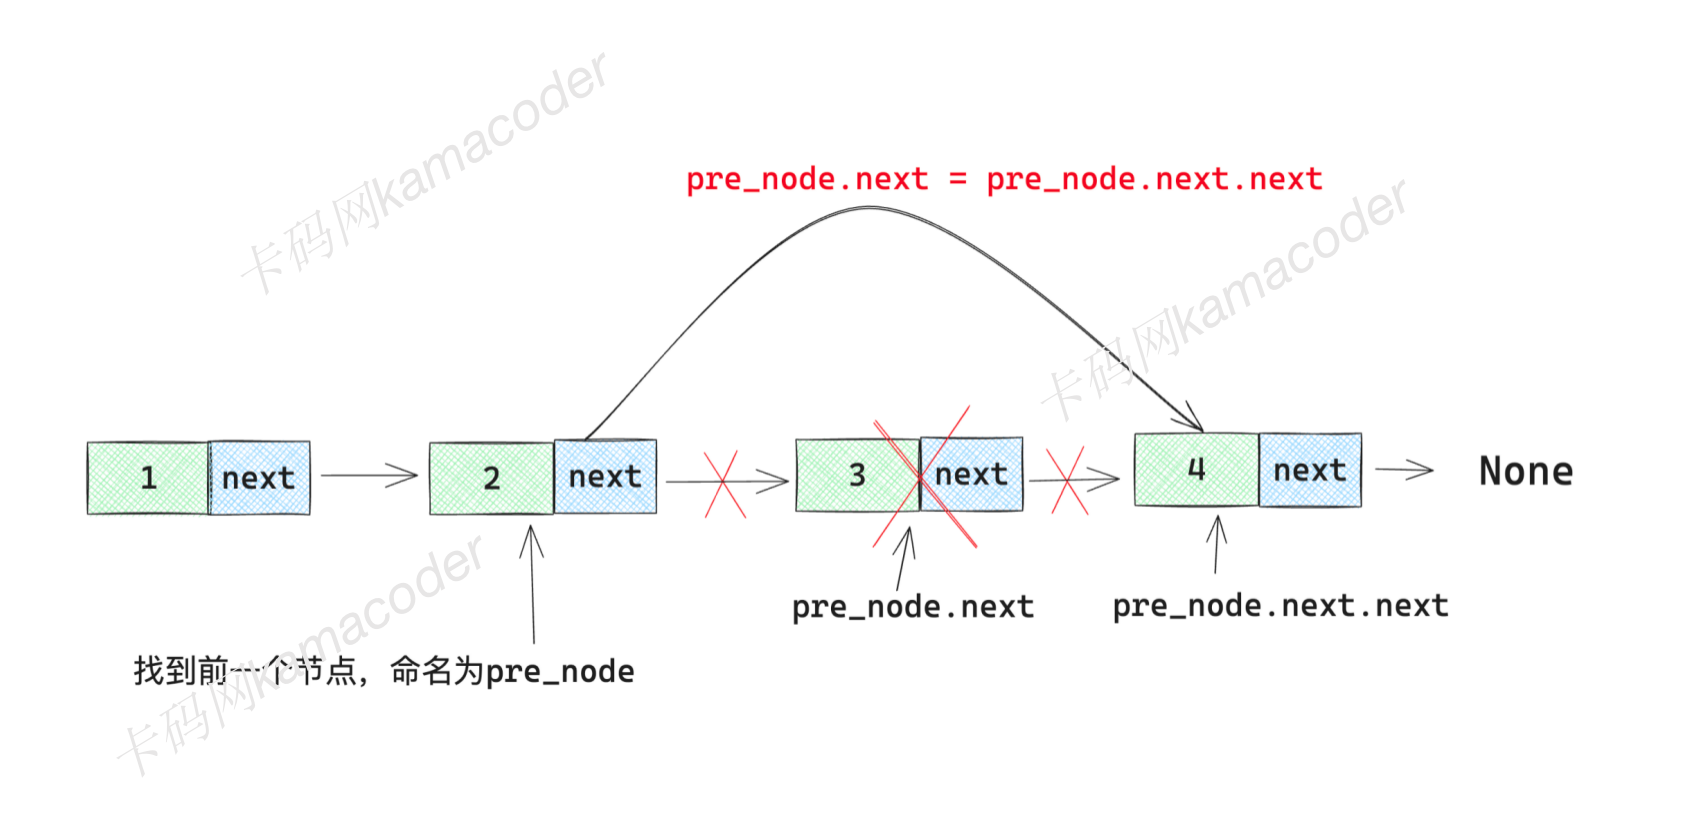

In [ ]:
# 代码实现

def delete(self, n):
    if self.headNode is None:  # 判断头节点是否还存在, 即链表是否为空链表
        return None
    if n == 1:  # 如果要删除头节点
        deleted_node = self.headNode
        self.headNode = self.headNode.next # 当前头节点的下一个节点成为新的头节点
        self.length -= 1
        return deleted_node
    else: # 如果要删除的不是头节点
        pre_node = self.get(n - 1) # 找到要删除的前一个节点
        if pre_node is not None and pre_node.next is not None:
            deleted_node = pre_node.next 
            pre_node.next = pre_node.next.next # 跳过要删除的节点
            self.length -= 1 # 链表长度 -1
            return deleted_node # 返回要删除的节点
    return None

In [ ]:
# 完整代码编写
# 定义链表节点类
class Node:
    def __init__(self, data):
        self.data = data
        self.next = None
# 定义链表类
class LinkList:
    # 主属性
    def __init__(self):
        self.head_node = None
        self.length = 0
    # 定义嵌入方法
    def insert(self, data):
        # 链表长度先加一
        self.length = self.length + 1
        new_node = Node(data)
        # 先看头节点是不是空的
        if self.head_node is None:
            # 如果是空的，那么头节点就是new_node
            self.head_node = new_node
            return self.head_node
        else:
            # 如果不是空的，将new_node插到尾部,从头节点开始遍历
            current_node = self.head_node
            # 遍历
            while current_node.next is not None:
                # current_node的下一个节点不是空的时候，继续往下遍历
                current_node = current_node.next
            # 遍历到最后一个时
            current_node.next = new_node
            # 返回new_code
            return new_node

    # 定义获取第n个节点的方法
    def get(self, n):
        # 先写出异常情况
        if n < 1 or n > self.length:
            return None
        # 然后开始遍历取值，从头节点开始遍历
        i = 1
        current_node = self.head_node
        # 没有遍历到最后一位时，往后加一
        while current_node is not None:
            if i == n:
                # 遍历到第n个了，返回第n个节点的值
                return current_node
            # 没到就接着加，一直到current_node为None为止
            i = i + 1
            current_node = current_node.next
        return None

    # 定义在提供的位置处插入节点的方法
    def insert_at(self, n, data):
        # 跟insert一样，先拿到这个new_node
        new_node = Node(data)
        # 如果将这个新节点插入到第一位，也就是霸占头节点的位置
        if n == 1:
            # 新节点的下一个位置是头节点，头节点的位置被新节点取代
            new_node.next = self.head_node
            self.head_node = new_node
            # 记住长度加一
            self.length = self.length + 1
            return new_node
        else:
            # 要插入第n个位置，先取出要插入位置的上一个节点
            pre_node = self.get(n - 1)
            # 这个上一个位置节点的下一个位置是新插入的节点
            # 先让new_code的下一个位置变为pro_code目前的下一个位置
            # 一定要保证不是最后一位
            if pre_node is not None:
                new_node.next = pre_node.next
                pre_node.next = new_node
                self.length = self.length + 1
                return new_node
        return None

    # 定义删除节点的方法
    def delete(self, n):
        # 如果头节点都是空的，那么返回None
        if self.head_node is None:
            return None

        # 跟插入第n个位置一样，也分为删除头节点和中间位置的节点
        if n == 1:
            # 这里记录一下删除的节点是哪个
            delete_node = self.head_node
            # 头节点变为他的下一个节点
            self.head_node = self.head_node.next
            self.length = self.length - 1
            return delete_node

        else:
            # 先取出删除位置n的上一个节点
            pre_node = self.get(n - 1)
            # 这里要注意一下if不是最后的位置
            if pre_node is not None and pre_node.next is not None:
                delete_node = self.get(n)
                pre_node.next = delete_node.next
                self.length = self.length - 1
                return delete_node

        # 注意写一下整个函数的返回值None
        return None

    # 定义打印链表的方法
    def print_link_list(self):
        # 从头开始打印
        current_node = self.head_node
        # 链表里边多用while循环
        while current_node is not None:
            # 循环里嵌套if语句，没到最后一个的时候打印
            if current_node.next is not None:
                # 打印节点current_node位置的值，加一个空格
                print(current_node.data, end=' ')
            else:
                # 如果是最后一个，就打印这个值就行，而不是打印对象
                print(current_node.data)  # 修改：打印节点的数据而非节点对象
            current_node = current_node.next
        return None


# 新建链表，将输入的元素插入到链表中
k = int(input())
link_list = LinkList()
elements = list(map(int, input().split()))

for data in elements:
    # 调用insert方法
    link_list.insert(data)

# 在第n个位置插入元素
# 后续会有s行的输入，每行两个整数n和x
# n是在第n个位置，x是在第n个位置插入x
s = int(input())
for _ in range(s):
    n, x = map(int, input().split())

    insert_node = link_list.insert_at(n, x)
    # 如果插入的节点不是空,就打印出来
    if insert_node is not None:
        link_list.print_link_list()
    # 否则就报错提示
    else:
        print("Insertion position is invalid.")


# 整数 L，表示后续会有 L 行输入，每行一个整数 m，代表删除链表中的第 m 个元素

l = int(input())
for _ in range(l):
    m = int(input())
    # 找到需要删除的位置的节点的值
    delete_node = link_list.delete(m)
    # 跟上边一样，不是空就打印，是空就提示报错
    if delete_node is not None:
        link_list.print_link_list()
    else:
        print("Deletion position is invalid.")
